In [319]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import great_tables as gt
import snha4py as snha
import networkx as nx

In [318]:
%pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [221]:
nfhs = pd.read_csv('cleaned_nfhs_data.csv')

In [222]:
nfhs.head()

,state,type_resident,cook_fuel,wealth_indx,district,househld_wt,religion,const_cata,own_hous,agri_land,...,hip_circ,haemog_lvl,anaemia,systolic,diastolic,bmi,height,weight,improveSani,drink_water_qua
0,11. sikkim,2. rural,5. kerosene,2. poorer,241. north district,104019,1. hindu,3. other backward class,NaN,NaN,...,NaN,NaN,NaN,136.33333,92.333336,NaN,NaN,NaN,Improved sanitation facility,Improved source
1,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,5. buddhist / neo-buddhist,2. scheduled tribe,NaN,1. male member,...,NaN,NaN,NaN,115.66666,84.666664,NaN,NaN,NaN,Improved sanitation facility,Improved source
2,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,5. buddhist / neo-buddhist,2. scheduled tribe,NaN,1. male member,...,91.4,131,4. not anemic,109.00000,83.333336,2236.0,1538.0,529.0,Improved sanitation facility,Improved source
3,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,5. buddhist / neo-buddhist,2. scheduled tribe,NaN,1. male member,...,NaN,NaN,NaN,90.00000,63.000000,NaN,NaN,NaN,Improved sanitation facility,Improved source
4,11. sikkim,2. rural,2. lpg,2. poorer,241. north district,104019,3. christian,3. other backward class,NaN,1. male member,...,NaN,NaN,NaN,113.33334,78.000000,NaN,NaN,NaN,Improved sanitation facility,Improved source


In [223]:
nfhs.describe()

,househld_wt,age,arm_circ,waist_circ,hip_circ,systolic,diastolic,bmi,height,weight
count,3.154290e+05,315429.000000,315411.000000,141493.000000,141495.000000,315429.000000,315429.000000,141363.000000,141527.000000,141526.000000
mean,9.945876e+05,38.713761,24.614351,79.217022,90.005751,124.493621,81.364138,2246.159412,1531.377772,529.344467
std,6.720614e+05,16.276922,2.743090,42.055805,40.292370,16.896196,10.413579,438.099029,300.399960,322.038200
min,4.769000e+04,15.000000,5.000000,30.000000,30.000000,70.000000,40.000000,1204.000000,800.000000,150.000000
25%,5.407950e+05,25.000000,23.000000,70.000000,82.100000,113.666660,74.666664,2004.000000,1482.000000,456.000000
50%,8.534210e+05,36.000000,24.000000,77.100000,88.600000,122.666660,80.666664,2203.000000,1517.000000,507.000000
75%,1.253706e+06,50.000000,26.000000,84.000000,94.600000,132.333330,87.000000,2426.000000,1561.000000,572.000000
max,7.953961e+06,90.000000,79.000000,999.600000,999.600000,249.000000,150.000000,9998.000000,9996.000000,9996.000000


<Axes: ylabel='systolic'>

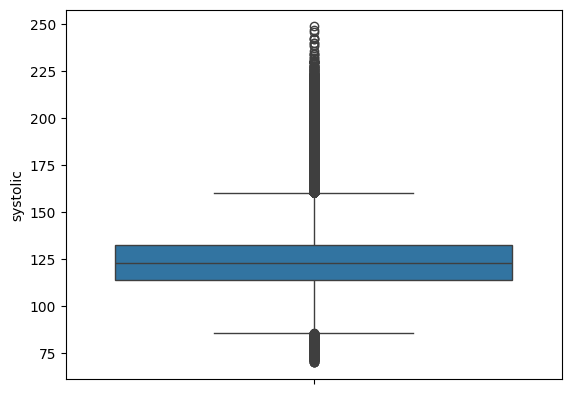

In [224]:
sns.boxplot(nfhs['systolic'])

In [225]:
nfhs = nfhs[
    ((nfhs['arm_circ'] >= 20) & (nfhs['arm_circ'] <= 30)) &
    ((nfhs['waist_circ'] >= 60) & (nfhs['waist_circ'] <= 120)) &
    ((nfhs['hip_circ'] >= 70) & (nfhs['hip_circ'] <= 130))
].copy()

display(nfhs.head())

,state,type_resident,cook_fuel,wealth_indx,district,househld_wt,religion,const_cata,own_hous,agri_land,...,hip_circ,haemog_lvl,anaemia,systolic,diastolic,bmi,height,weight,improveSani,drink_water_qua
2,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,5. buddhist / neo-buddhist,2. scheduled tribe,NaN,1. male member,...,91.4,131,4. not anemic,109.00000,83.333336,2236.0,1538.0,529.0,Improved sanitation facility,Improved source
5,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,96. other,2. scheduled tribe,NaN,NaN,...,99.8,136,4. not anemic,124.66666,73.333336,2247.0,1617.0,588.0,Improved sanitation facility,Improved source
8,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,1. hindu,1. scheduled caste,NaN,NaN,...,88.0,125,4. not anemic,109.00000,71.666664,1867.0,1586.0,470.0,Improved sanitation facility,Improved source
9,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,1. hindu,1. scheduled caste,NaN,NaN,...,100.1,146,4. not anemic,132.66667,97.333336,2820.0,1523.0,654.0,Improved sanitation facility,Improved source
11,11. sikkim,2. rural,2. lpg,4. richer,241. north district,104019,1. hindu,3. other backward class,NaN,NaN,...,92.0,109,2. moderate,104.00000,72.000000,2172.0,1563.0,531.0,Improved sanitation facility,Improved source


In [226]:
nfhs['bmi'] = nfhs['bmi'] / 100
display(nfhs.head())

,state,type_resident,cook_fuel,wealth_indx,district,househld_wt,religion,const_cata,own_hous,agri_land,...,hip_circ,haemog_lvl,anaemia,systolic,diastolic,bmi,height,weight,improveSani,drink_water_qua
2,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,5. buddhist / neo-buddhist,2. scheduled tribe,NaN,1. male member,...,91.4,131,4. not anemic,109.00000,83.333336,22.36,1538.0,529.0,Improved sanitation facility,Improved source
5,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,96. other,2. scheduled tribe,NaN,NaN,...,99.8,136,4. not anemic,124.66666,73.333336,22.47,1617.0,588.0,Improved sanitation facility,Improved source
8,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,1. hindu,1. scheduled caste,NaN,NaN,...,88.0,125,4. not anemic,109.00000,71.666664,18.67,1586.0,470.0,Improved sanitation facility,Improved source
9,11. sikkim,2. rural,2. lpg,3. middle,241. north district,104019,1. hindu,1. scheduled caste,NaN,NaN,...,100.1,146,4. not anemic,132.66667,97.333336,28.20,1523.0,654.0,Improved sanitation facility,Improved source
11,11. sikkim,2. rural,2. lpg,4. richer,241. north district,104019,1. hindu,3. other backward class,NaN,NaN,...,92.0,109,2. moderate,104.00000,72.000000,21.72,1563.0,531.0,Improved sanitation facility,Improved source


In [227]:
nfhs = nfhs[(nfhs['bmi'] >= 12) & (nfhs['bmi'] <= 35)].copy()

In [228]:
nfhs['height'] = nfhs['height'] / 10

In [229]:
nfhs['height'] = nfhs['height'].clip(lower=120, upper=198.12)

In [230]:
nfhs['weight'] = nfhs['weight'] / 10

In [231]:
nfhs['weight'] = nfhs['weight'].clip(lower=20, upper=100)

In [232]:
nfhs.isna().sum()

state                  0
type_resident          0
cook_fuel              0
wealth_indx            0
district               0
househld_wt            0
religion               0
const_cata         18228
own_hous           44398
agri_land          75620
househld_strc          0
sex                    0
age                    0
education              0
educ_status            0
tobacco_user           0
alcohol_user           0
tb                     0
arm_circ               0
glucose_lvl         1235
waist_circ             0
hip_circ               0
haemog_lvl         17225
anaemia             1829
systolic               0
diastolic              0
bmi                    0
height                18
weight                18
improveSani         1996
drink_water_qua        0
dtype: int64

In [233]:
for col in ['glucose_lvl', 'haemog_lvl']:
    nfhs[col] = pd.to_numeric(nfhs[col], errors='coerce')

for col in ['height', 'weight', 'glucose_lvl', 'haemog_lvl']:
    nfhs[col].fillna(nfhs[col].mean(), inplace=True)

display(nfhs.isna().sum())

/var/folders/ym/zkfpwpfn0gv9t2vxqw2cvqsr0000gn/T/ipykernel_4716/634819715.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nfhs[col].fillna(nfhs[col].mean(), inplace=True)


state                  0
type_resident          0
cook_fuel              0
wealth_indx            0
district               0
househld_wt            0
religion               0
const_cata         18228
own_hous           44398
agri_land          75620
househld_strc          0
sex                    0
age                    0
education              0
educ_status            0
tobacco_user           0
alcohol_user           0
tb                     0
arm_circ               0
glucose_lvl            0
waist_circ             0
hip_circ               0
haemog_lvl             0
anaemia             1829
systolic               0
diastolic              0
bmi                    0
height                 0
weight                 0
improveSani         1996
drink_water_qua        0
dtype: int64

In [234]:
for col in ['const_cata', 'own_hous', 'agri_land']:
    nfhs[col].fillna(nfhs[col].mode()[0], inplace=True)

display(nfhs.isna().sum())

/var/folders/ym/zkfpwpfn0gv9t2vxqw2cvqsr0000gn/T/ipykernel_4716/514500280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nfhs[col].fillna(nfhs[col].mode()[0], inplace=True)


state                 0
type_resident         0
cook_fuel             0
wealth_indx           0
district              0
househld_wt           0
religion              0
const_cata            0
own_hous              0
agri_land             0
househld_strc         0
sex                   0
age                   0
education             0
educ_status           0
tobacco_user          0
alcohol_user          0
tb                    0
arm_circ              0
glucose_lvl           0
waist_circ            0
hip_circ              0
haemog_lvl            0
anaemia            1829
systolic              0
diastolic             0
bmi                   0
height                0
weight                0
improveSani        1996
drink_water_qua       0
dtype: int64

In [235]:
nfhs.dropna(subset=['anaemia', 'improveSani'], inplace=True)
display(nfhs.isna().sum())

state              0
type_resident      0
cook_fuel          0
wealth_indx        0
district           0
househld_wt        0
religion           0
const_cata         0
own_hous           0
agri_land          0
househld_strc      0
sex                0
age                0
education          0
educ_status        0
tobacco_user       0
alcohol_user       0
tb                 0
arm_circ           0
glucose_lvl        0
waist_circ         0
hip_circ           0
haemog_lvl         0
anaemia            0
systolic           0
diastolic          0
bmi                0
height             0
weight             0
improveSani        0
drink_water_qua    0
dtype: int64

<Axes: ylabel='glucose_lvl'>

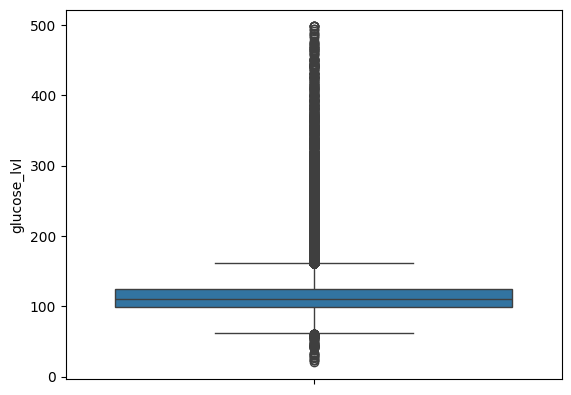

In [236]:
sns.boxplot(nfhs['glucose_lvl'])

In [237]:
nfhs['haemog_lvl'] = nfhs['haemog_lvl'] / 10

In [238]:
nfhs['haemog_lvl'] = nfhs['haemog_lvl'].clip(lower=8, upper=20)

In [239]:
nfhs['glucose_lvl'].describe()

count    124151.000000
mean        114.328761
std          26.983946
min          20.000000
25%          99.000000
50%         110.000000
75%         124.000000
max         498.000000
Name: glucose_lvl, dtype: float64

In [240]:
nfhs['glucose_lvl'] = nfhs['glucose_lvl'].clip(lower=50, upper=160)

In [241]:
# @title
nfhs.isna().sum()

state              0
type_resident      0
cook_fuel          0
wealth_indx        0
district           0
househld_wt        0
religion           0
const_cata         0
own_hous           0
agri_land          0
househld_strc      0
sex                0
age                0
education          0
educ_status        0
tobacco_user       0
alcohol_user       0
tb                 0
arm_circ           0
glucose_lvl        0
waist_circ         0
hip_circ           0
haemog_lvl         0
anaemia            0
systolic           0
diastolic          0
bmi                0
height             0
weight             0
improveSani        0
drink_water_qua    0
dtype: int64

In [242]:
nf = pd.read_csv('nfhs_cleaned.csv')

Text(0.5, 1.0, 'Number of Participants by State')

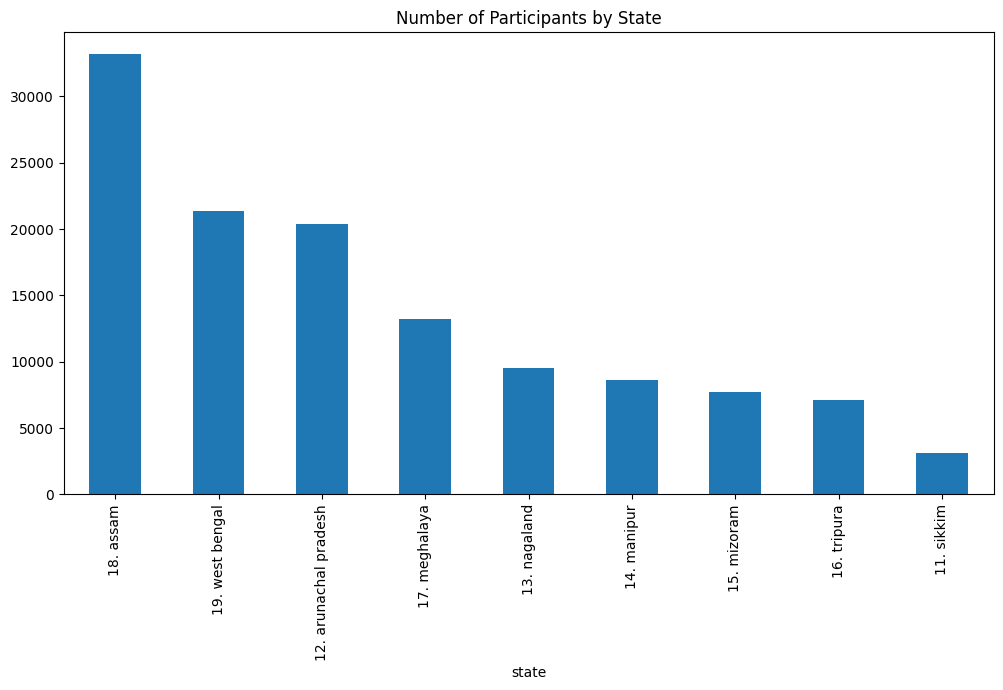

In [243]:
nf['state'].value_counts()
nf['state'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Participants by State')

In [244]:


# Assuming nf is your DataFrame
numeric_cols = nf.select_dtypes(include='number').columns
nf[numeric_cols].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
househld_wt,124151.0,995075.472127,672612.298415,47690.00,540974.00,850973.000000,1.253921e+06,7953961.00
age,124151.0,31.185282,9.883853,15.00,23.00,30.000000,3.900000e+01,72.00
arm_circ,124151.0,24.285837,2.239958,20.00,23.00,24.000000,2.600000e+01,30.00
glucose_lvl,124151.0,112.672053,18.586299,50.00,99.00,110.000000,1.240000e+02,160.00
waist_circ,124151.0,78.096646,9.469175,60.00,70.80,77.800000,8.410000e+01,120.00
hip_circ,124151.0,89.109314,8.328871,70.00,83.20,89.100000,9.460000e+01,130.00
haemog_lvl,124151.0,11.797383,1.436339,8.00,11.00,11.776548,1.270000e+01,20.00
systolic,124151.0,119.151090,13.337526,70.00,110.00,118.666660,1.263333e+02,221.00
diastolic,124151.0,79.211812,9.090880,41.00,73.00,79.000000,8.450000e+01,148.00
bmi,124151.0,22.443556,3.200821,12.04,20.27,22.140000,2.426000e+01,35.00


In [245]:
categorical_cols = nf.select_dtypes(exclude='number').columns

for col in categorical_cols:
    print(f"\nFrequency table for: {col}")
    print(nf[col].value_counts(dropna=False))



Frequency table for: state
state
18. assam                33199
19. west bengal          21360
12. arunachal pradesh    20366
17. meghalaya            13231
13. nagaland              9480
14. manipur               8592
15. mizoram               7705
16. tripura               7100
11. sikkim                3118
Name: count, dtype: int64

Frequency table for: type_resident
type_resident
2. rural    98157
1. urban    25994
Name: count, dtype: int64

Frequency table for: cook_fuel
cook_fuel
8. wood                        62521
2. lpg                         53307
9. straw/shrubs/grass           2061
10. agricultural crop           1204
1. electricity                  1173
7. charcoal                     1142
6. coal, lignite                 926
5. kerosene                      765
11. animal dung                  467
4. biogas                        426
96. other                        151
95. no food cooked in house        8
Name: count, dtype: int64

Frequency table for: wealth_indx
wea

In [ ]:
# great_tables is already installed and imported as gt

for col in categorical_cols:
    freq_table = nf[col].value_counts(dropna=False).reset_index()
    freq_table.columns = [col, 'count']
    table = gt.GT(freq_table)
    table.show()


In [ ]:
nf['cook_fuel'].value_counts()

In [248]:
nf['type_resident'].unique()

array(['2. rural', '1. urban'], dtype=object)

In [ ]:
fuel_pollution_map = {
    '1. electricity': 'Low Pollutant Fuel',
    '2. lpg': 'Low Pollutant Fuel',
    '4. biogas': 'Low Pollutant Fuel',
    
    '5. kerosene': 'High Pollutant Fuel',
    '6. coal, lignite': 'High Pollutant Fuel',
    '7. charcoal': 'High Pollutant Fuel',
    '8. wood': 'High Pollutant Fuel',
    '10. agricultural crop': 'High Pollutant Fuel',
    '11. animal dung': 'High Pollutant Fuel',

    '95. no food cooked in house': 'Other',
    '96. other': 'Other'
}

# Replace the original values with the mapped categories in the same column
nf['cook_fuel'] = nf['cook_fuel'].map(fuel_pollution_map).fillna('Other')
nf['cook_fuel'].value_counts().plot(kind='bar', figsize=(12, 6))

In [250]:
# Get sorted unique values
unique_states = sorted(nf['state'].unique())

# Create mapping: each unique state gets a number starting from 1
state_label_map = {state: i+1 for i, state in enumerate(unique_states)}

# Preview mapping
print(state_label_map)


{'11. sikkim': 1, '12. arunachal pradesh': 2, '13. nagaland': 3, '14. manipur': 4, '15. mizoram': 5, '16. tripura': 6, '17. meghalaya': 7, '18. assam': 8, '19. west bengal': 9}


In [251]:
nf['state'] = nf['state'].map(state_label_map)


In [ ]:
nf['wealth_indx'].value_counts()


In [ ]:
# Plotting the distribution of type of residence
nf['type_resident'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'salmon']
)

plt.title('Distribution of Type of Residence', fontsize=14)
plt.xlabel('Type of Residence Code (1 = Urban, 2 = Rural)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [254]:
#%pip install snha4py

In [ ]:
nf.head(10)

In [256]:
# Number of categorical columns
num_categorical = len(categorical_cols)

# Columns that need to be converted to categorical (i.e., currently not dtype 'category')
not_categorical = [col for col in categorical_cols if nf[col].dtype != 'category']
num_not_categorical = len(not_categorical)

print(f"Total categorical columns: {num_categorical}")
print(f"Columns to convert to categorical: {num_not_categorical}")
print("Columns to convert:", not_categorical)

Total categorical columns: 19
Columns to convert to categorical: 19
Columns to convert: ['state', 'type_resident', 'cook_fuel', 'wealth_indx', 'district', 'religion', 'const_cata', 'own_hous', 'agri_land', 'househld_strc', 'sex', 'education', 'educ_status', 'tobacco_user', 'alcohol_user', 'tb', 'anaemia', 'improveSani', 'drink_water_qua']


In [ ]:
# Convert all columns in not_categorical to pandas 'category' dtype
for col in not_categorical:
    nf[col] = nf[col].astype('category')

# Check conversion
nf.dtypes.loc[not_categorical]

In [283]:
nf.head(10)

,state,type_resident,cook_fuel,wealth_indx,district,religion,const_cata,own_hous,agri_land,househld_strc,...,hip_circ,haemog_lvl,anaemia,systolic,diastolic,bmi,height,weight,improveSani,drink_water_qua
0,1,2,2,3,1,5,2,1,1,2,...,91.4,13.1,4,109.00000,83.333336,22.36,153.8,52.9,1,1
1,1,2,2,3,1,9,2,1,1,1,...,99.8,13.6,4,124.66666,73.333336,22.47,161.7,58.8,1,1
2,1,2,2,3,1,1,1,1,1,2,...,88.0,12.5,4,109.00000,71.666664,18.67,158.6,47.0,1,1
3,1,2,2,3,1,1,1,1,1,1,...,100.1,14.6,4,132.66667,97.333336,28.20,152.3,65.4,1,1
4,1,2,2,4,1,1,3,1,1,1,...,92.0,10.9,2,104.00000,72.000000,21.72,156.3,53.1,1,1
5,1,2,2,4,1,1,3,1,1,1,...,92.0,11.9,3,109.00000,69.000000,21.43,153.2,50.3,1,1
6,1,2,2,3,1,1,3,1,1,1,...,91.0,13.6,4,107.33334,78.666664,24.41,145.8,51.9,1,1
7,1,2,2,4,1,3,3,1,1,2,...,94.0,10.4,2,118.33334,82.666664,23.84,149.8,53.5,1,1
8,1,2,2,4,1,3,3,1,1,2,...,99.0,9.6,2,99.00000,75.333336,25.71,154.3,61.2,1,1
9,1,2,2,2,1,1,1,1,1,1,...,100.0,13.8,4,123.00000,88.000000,26.48,154.8,63.5,1,1


In [ ]:
nf['educ_status'].value_counts()

In [ ]:
# List of categorical columns you provided
categorical_cols = [
    'type_resident', 'cook_fuel', 'wealth_indx', 'district', 'religion',
    'const_cata', 'own_hous', 'agri_land', 'househld_strc', 'sex',
    'education', 'educ_status', 'tobacco_user', 'alcohol_user', 'tb',
    'anaemia', 'improveSani', 'drink_water_qua'
]

# Apply mapping to each column
for col in categorical_cols:
    # Clean string values (optional but helpful if raw labels are inconsistent)
    nf[col] = nf[col].astype(str).str.strip().str.lower()
    
    # Get sorted unique values and assign numbers starting from 1
    label_map = {val: i+1 for i, val in enumerate(sorted(nf[col].unique()))}
    
    # Replace original values with numeric codes
    nf[col] = nf[col].map(label_map).astype('category')
    
    # Optional: Print label mapping for your codebook
    print(f"Mapping for {col}:")
    print(label_map)
    print("-" * 40)


In [279]:
nf.describe()

,age,arm_circ,glucose_lvl,waist_circ,hip_circ,haemog_lvl,systolic,diastolic,bmi,height,weight
count,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000
mean,31.185282,24.285837,112.672053,78.096646,89.109314,11.797383,119.151090,79.211812,22.443556,152.343514,52.178606
std,9.883853,2.239958,18.586299,9.469175,8.328871,1.436339,13.337526,9.090880,3.200821,6.438564,8.515433
min,15.000000,20.000000,50.000000,60.000000,70.000000,8.000000,70.000000,41.000000,12.040000,120.000000,23.500000
25%,23.000000,23.000000,99.000000,70.800000,83.200000,11.000000,110.000000,73.000000,20.270000,148.400000,46.400000
50%,30.000000,24.000000,110.000000,77.800000,89.100000,11.776548,118.666660,79.000000,22.140000,151.900000,51.200000
75%,39.000000,26.000000,124.000000,84.100000,94.600000,12.700000,126.333340,84.500000,24.260000,156.100000,57.200000
max,72.000000,30.000000,160.000000,120.000000,130.000000,20.000000,221.000000,148.000000,35.000000,198.120000,99.000000


In [264]:
nf['cook_fuel'] = nf['cook_fuel'].astype('category')

In [271]:
nf = nf.drop(columns=['househld_wt'])

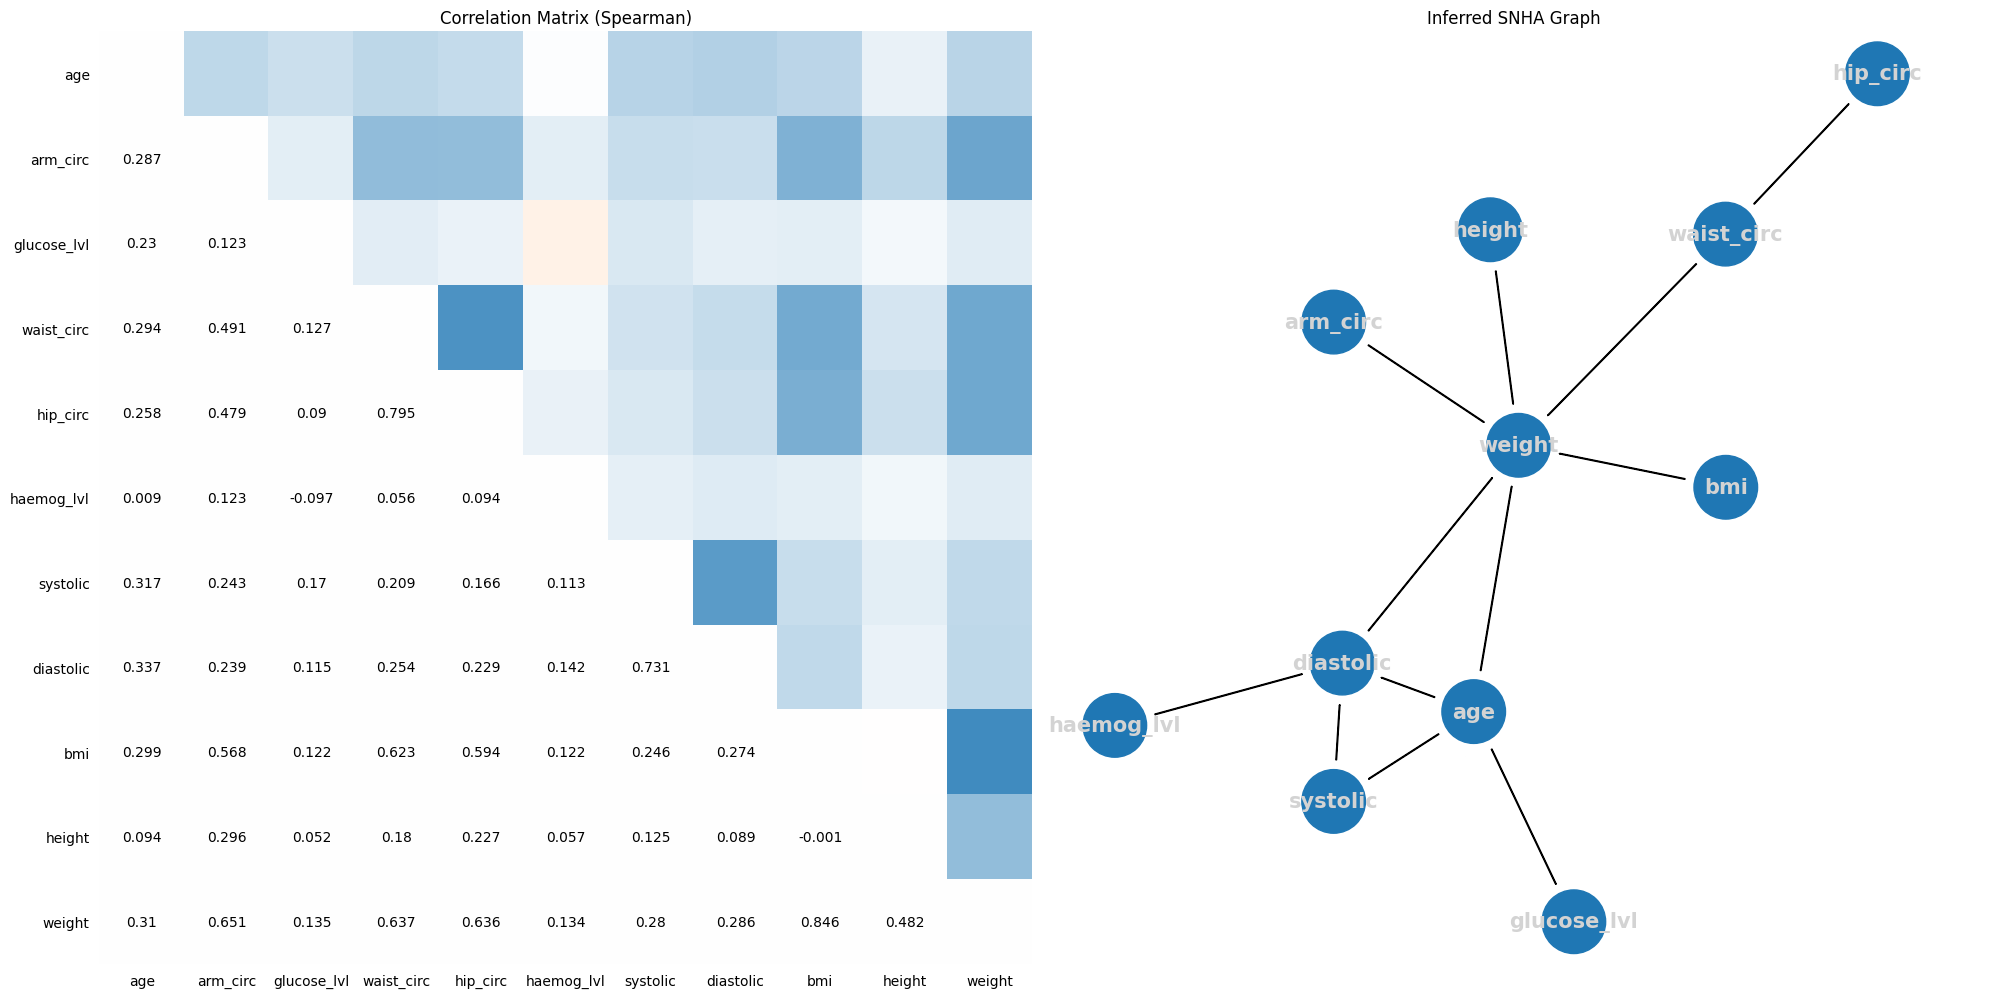

In [284]:
# Assume your dataset is called nf
# Keep only numeric columns and drop rows with missing values
data = nf.select_dtypes(include=['number']).dropna()

# Optional: reduce to top 25 variables if too many
data = data.iloc[:, :25]

# Initialize SNHA
s = Snha()
s.new_graph()

# Correct: assign DataFrame directly, not .values
s.data = data
s.columns = list(data.columns)  # Optional but good for clarity

# Compute correlation and build graph
s.comp_corr(method='spearman')
s.st_nich_alg()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

s.plot_corr(ax=ax[0])
s.plot_graph(ax=ax[1])

ax[0].set_title('Correlation Matrix (Spearman)')
ax[1].set_title('Inferred SNHA Graph')

plt.tight_layout()
plt.show()


In [294]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [303]:
nf['height'].describe()

count    124151.000000
mean        152.343514
std           6.438564
min         120.000000
25%         148.400000
50%         151.900000
75%         156.100000
max         198.120000
Name: height, dtype: float64

In [304]:
nf.describe()

,age,arm_circ,glucose_lvl,waist_circ,hip_circ,haemog_lvl,systolic,diastolic,bmi,height,weight
count,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000,124151.000000
mean,31.185282,24.285837,112.672053,78.096646,89.109314,11.797383,119.151090,79.211812,22.443556,152.343514,52.178606
std,9.883853,2.239958,18.586299,9.469175,8.328871,1.436339,13.337526,9.090880,3.200821,6.438564,8.515433
min,15.000000,20.000000,50.000000,60.000000,70.000000,8.000000,70.000000,41.000000,12.040000,120.000000,23.500000
25%,23.000000,23.000000,99.000000,70.800000,83.200000,11.000000,110.000000,73.000000,20.270000,148.400000,46.400000
50%,30.000000,24.000000,110.000000,77.800000,89.100000,11.776548,118.666660,79.000000,22.140000,151.900000,51.200000
75%,39.000000,26.000000,124.000000,84.100000,94.600000,12.700000,126.333340,84.500000,24.260000,156.100000,57.200000
max,72.000000,30.000000,160.000000,120.000000,130.000000,20.000000,221.000000,148.000000,35.000000,198.120000,99.000000


In [313]:
%pip install scipy
from scipy import stats 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 10.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [314]:
from scipy.stats import ttest_ind
ttest_ind(df[df.sex == 'Male']['height'], df[df.sex == 'Female']['height'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [315]:
# Replace these with the actual column names from your dataset
anthro_cols = ['height', 'weight', 'bmi', 'arm_circ', 'waist_circ', 'hip_circ']

# Subset the DataFrame
df_anthro = nf[anthro_cols]


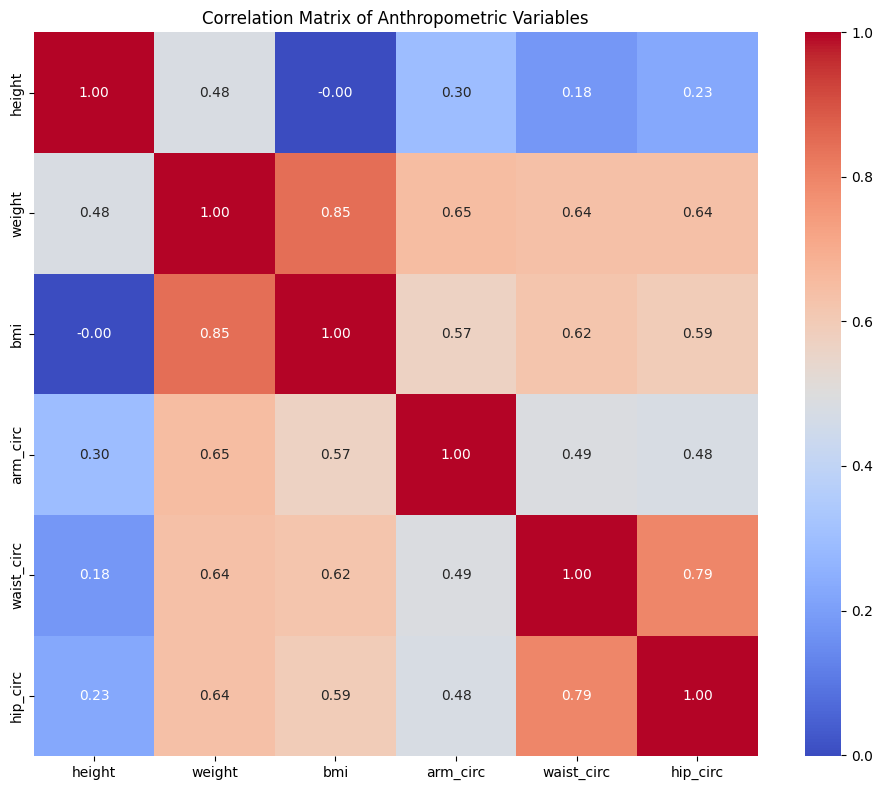

In [316]:
# Compute correlation matrix
corr_matrix = df_anthro.corr(method='spearman')  # You can also use 'pearson'

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix of Anthropometric Variables')
plt.tight_layout()
plt.show()
